<a href="https://www.kaggle.com/code/shubhamgupta012/eda-and-visualisation-on-virat-kohli?scriptVersionId=133596029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virat-kohli-all-international-cricket-centuries/Virat-Kohli-International-Cricket-Centuries.csv


# Importing Library

In [2]:
import matplotlib.pyplot as plt
import string
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv('/kaggle/input/virat-kohli-all-international-cricket-centuries/Virat-Kohli-International-Cricket-Centuries.csv')
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


# Univariate Analysis

In [4]:
df.shape

(75, 9)

In [5]:
df.describe()

,No.,Position,Innings
count,75.000000,75.000000,75.000000
mean,38.000000,3.520000,1.706667
std,21.794495,0.664953,0.673300
min,1.000000,2.000000,1.000000
25%,19.500000,3.000000,1.000000
50%,38.000000,3.000000,2.000000
75%,56.500000,4.000000,2.000000
max,75.000000,6.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       75 non-null     int64 
 1   Runs      75 non-null     object
 2   Against   75 non-null     object
 3   Position  75 non-null     int64 
 4   Innings   75 non-null     int64 
 5   Venue     75 non-null     object
 6   Ground    75 non-null     object
 7   Date      75 non-null     object
 8   Result    75 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.4+ KB


In [7]:
df.dtypes

No.          int64
Runs        object
Against     object
Position     int64
Innings      int64
Venue       object
Ground      object
Date        object
Result      object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won


In [10]:
df.dtypes

No.                  int64
Runs                object
Against             object
Position             int64
Innings              int64
Venue               object
Ground              object
Date        datetime64[ns]
Result              object
dtype: object

## Value Counts of each columns

In [11]:
df['Position'].value_counts()

3    39
4    31
5     3
6     1
2     1
Name: Position, dtype: int64

In [12]:
df['Against'].value_counts()

 Australia       16
 Sri Lanka       15
 West Indies     11
 New Zealand      8
 England          8
 South Africa     7
 Bangladesh       6
 Pakistan         2
 Zimbabwe         1
 Afghanistan      1
Name: Against, dtype: int64

In [13]:
df['Venue'].value_counts()

Adelaide Oval, Adelaide                                  5
Sher-e-Bangla Cricket Stadium, Dhaka                     4
Eden Gardens, Kolkata                                    3
Queen's Park Oval, Port of Spain                         3
Maharashtra Cricket Association Stadium, Pune            3
R. Premadasa Stadium, Colombo                            3
Vidarbha Cricket Association Stadium, Nagpur             3
Galle International Stadium, Galle                       2
Melbourne Cricket Ground, Melbourne                      2
JSCA International Stadium, Ranchi                       2
SuperSport Park, Centurion                               2
ACA-VDCA Cricket Stadium, Visakhapatnam                  2
Wankhede Stadium, Mumbai                                 2
M. A. Chidambaram Stadium, Chennai                       2
ACA Stadium, Guwahati                                    2
Feroz Shah Kotla Ground, Delhi                           2
APCA-VDCA Stadium, Visakhapatnam                        

In [14]:
df['Ground'].value_counts()

Home       35
Away       35
Neutral     5
Name: Ground, dtype: int64

In [15]:
df['Result'].value_counts()

Won           51
Lost          13
Drawn          8
Lost (D/L)     1
Won (D/L)      1
Tied           1
Name: Result, dtype: int64

## Changing Data type

In [16]:
df['Year'] = df['Date'].dt.year

In [17]:
df['Runs']=df['Runs'].astype(str)

## Feature Generation

In [18]:
df['Status']=df['Runs'].str.contains(r'[^\w\s]', regex=True)


In [19]:
df.loc[df['Status'] == True, 'Status'] = 'Not Out' 
df.loc[df['Status'] == False, 'Status'] = 'Out'

In [20]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Status
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009,Out
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010,Out
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011,Not Out


In [21]:
df['Runs'] = df['Runs'].str.replace(r'[^\w\s]', '')
df['Runs']=df['Runs'].astype(str).astype(int)

/tmp/ipykernel_20/1551396017.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Runs'] = df['Runs'].str.replace(r'[^\w\s]', '')


In [22]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Status
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009,Out
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010,Out
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011,Not Out


In [23]:
df.dtypes

No.                  int64
Runs                 int64
Against             object
Position             int64
Innings              int64
Venue               object
Ground              object
Date        datetime64[ns]
Result              object
Year                 int64
Status              object
dtype: object

# Visualization

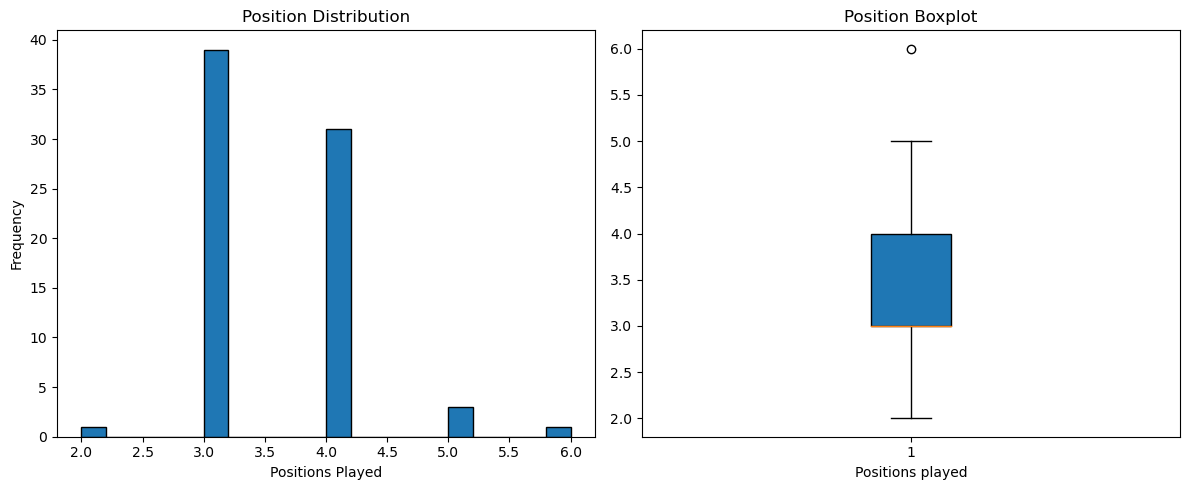

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Position'], bins=20, edgecolor='black')
axes[0].set_xlabel('Positions Played')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Position Distribution')

# Box Plot
axes[1].boxplot(df['Position'],patch_artist=True)
axes[1].set_xlabel('Positions played')
# axes[1].set_yticklabels([''])
axes[1].set_title('Position Boxplot')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'No.'}>,
        <Axes: title={'center': 'Runs'}>],
       [<Axes: title={'center': 'Position'}>,
        <Axes: title={'center': 'Innings'}>],
       [<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

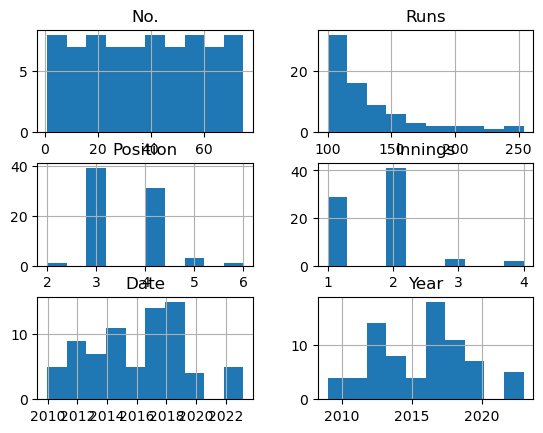

In [25]:
df.hist()

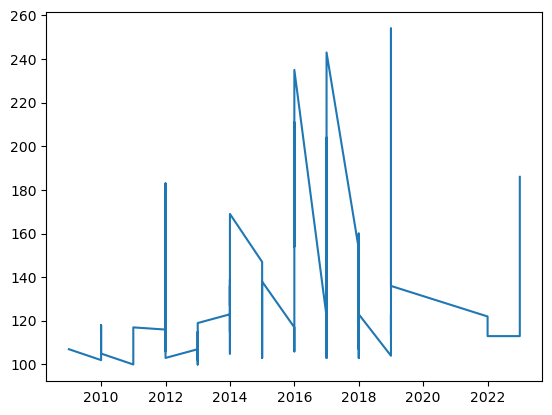

In [26]:
plt.plot(df['Year'],df['Runs'])

<Axes: xlabel='Year', ylabel='Runs'>

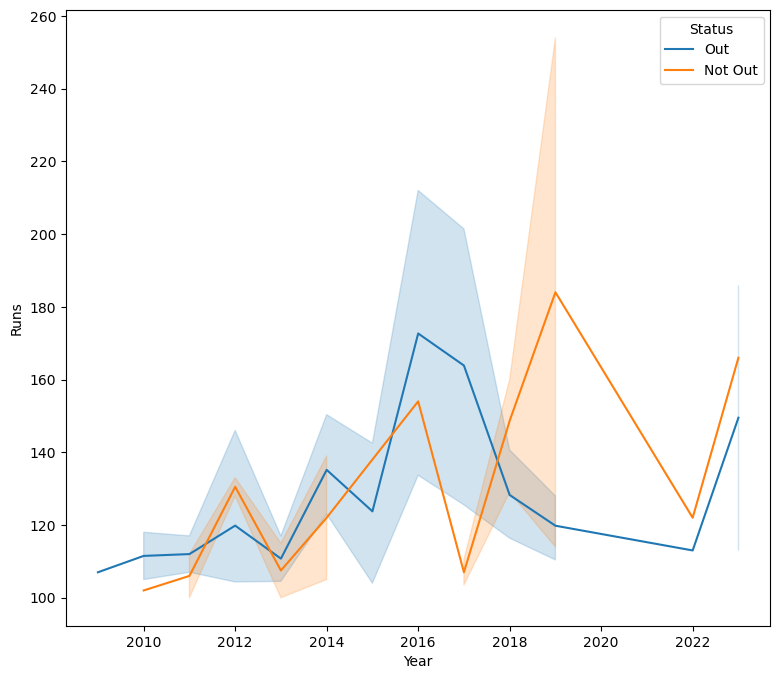

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Runs',data=df,hue='Status')

<Axes: xlabel='Year', ylabel='Runs'>

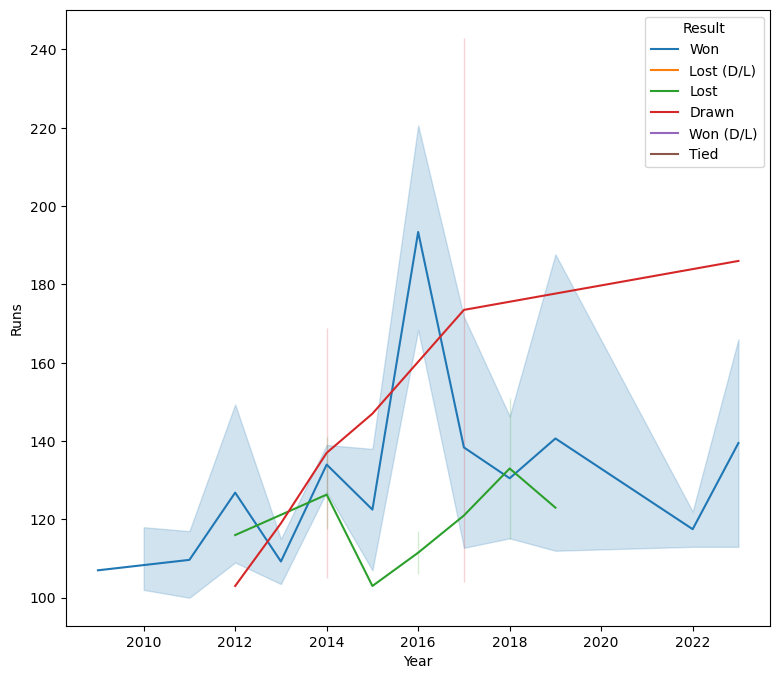

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Runs',data=df,hue='Result')

<Axes: xlabel='Year', ylabel='Runs'>

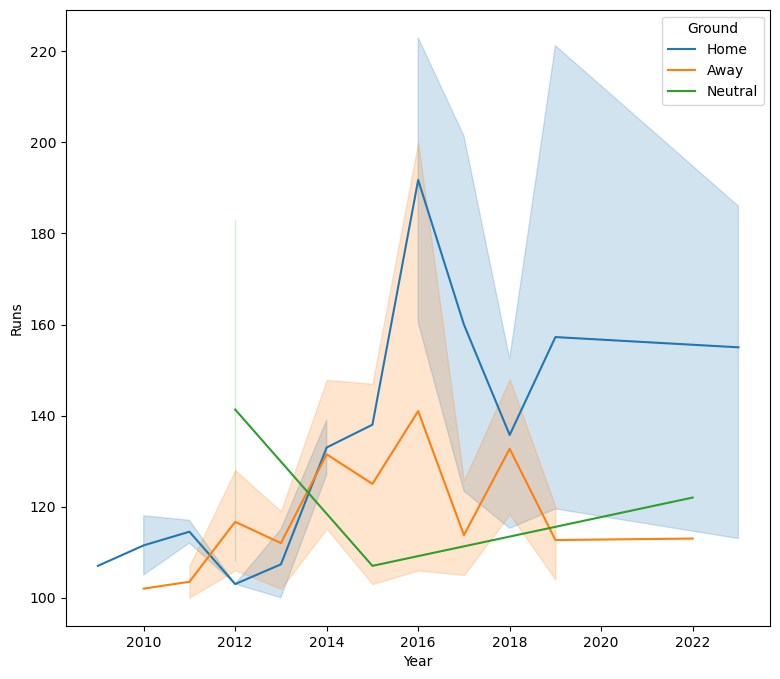

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Runs',data=df,hue='Ground')